In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf #needed for models in this script
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
pd.set_option('html', True) #see the dataframe in a more user friendly manner
%matplotlib inline

## Profiling Data

As you saw in the last unit, we can profile data both by computing important statistics and by visually inspecting the data. Visual inspection is important in order to understand the overall structure and composition of the data. Sometimes outliers are noise and sometimes they are vital points to be analyzed and understood. Whatever the case, visual inspection is also important for understanding the limitations of our analytical tools.

For example, there is the famous case of Anscombe's Quartet. This was an exercise whereby four very different datasets were composed with the same statistical measures (mean, variance, correlation, and linear regression line):

![](files/nycbike1.jpg)

The descriptive statistics you learned before are important, but they're not the end of the story. Be sure to visualize your data and understand the limits of your analysis. For example, if you have a long-tail distribution, like the credit distribution from previous lessons:

![](files/nycbike2.jpg)

The mean becomes much less helpful for understanding the data distribution, and you'll want to use the median. Household income and age are both good examples of attributes that usually have a long tail and are best described by the median rather than the mean.

## Download Citi Bike Station Data

One of the important things data scientists bring to their work is not only advanced tools, but a curiosity about the context for their data. We call this "domain knowledge". In this case, the domain would be bike share programs, specificaly the bike share program in New York City. Domain knowledge is essential to producing accurate and useful analysis. Without such knowledge, it's easy to produce models that describe something that is neither useful or important. In some cases, you may already be familiar with the domain, but often we're asked to work in a domain in which we have no expertise. In those cases, it's important that you be able to quickly acquire the necessary domain expertise to properly apply the skills you've gained in order to both ask the right questions and produce meaningful and accurate results. For a discussion of this from some of the leaders in the field of data science, see this recent debate on the topic (http://medriscoll.com/post/18784448854/the-data-science-debate-domain-expertise-or).

<b>Goal:</b> Record the number of bikes available every minute for an hour across all of New York City in order to see which station or set of stations is the most active in New York City for that hour. Activity is defined as the total number of bicycles taken out or returned in an hour. So if 2 bikes are brought in and 4 bikes are taken out, that station has an activity level of 6.   
<b>Note:</b> It's important to define the terms of analysis. In this case, activity has a particular definition. In many cases, the measurement of interest could be defined in many ways and it's important to be as specific as possible. For example, in studying outcomes from an experimental drug treatment, "success" may be defined as prolonging life for a certain amount of time, 6 months, over some estimated baseline. Ideas like "better", "best", "successful", and "enjoyable" need to be defined such that they can be measured and compared, even if in doing so much of the common meaning for the terms is lost.

### Import package to access URL

To download from a URL, we need to use a special package that handles going to the Internet and downloading the resulting page. In this case, we'll be using a package called requests (package that allows us to download data from any online resource). Documentation for this package: http://docs.python-requests.org/en/latest/

In [3]:
import requests

### Access the URL

In [4]:
nyc_bike = requests.get('http://www.citibikenyc.com/stations/json')

<b>Note:</b> Usually (and the supporting documents) use 'r.' for requests (Ex. r = requests.get('http://www.citibikenyc.com/stations/json'). However, as above, you can call the file you are requesting anything you wish (nyc_bike above) and then you access the commands associated with requests by typing the name of the file you created followed by a period and then tab; for nyc_bike it would look like: nyc_bike. [tab]

Although not in iPython, the commands available are the same as:

![](files/nycbike3.jpg)

You can see there are a number of available methods. The ones you want right now are the ones that allow us to view the actual content of the request. You can see the webpage you downloaded for yourself (http://www.citibikenyc.com/stations/json).

<b>Note:</b> In Chrome, you can install the JSONView extension that will automatically format JSON files to be more readible in the browser. Download it here: https://chrome.google.com/webstore/detail/jsonview/chklaanhfefbnpoihckbnefhakgolnmc?utm_source=chrome-ntp-icon

To get a basic view of the text type:

In [5]:
nyc_bike.text

u'{"executionTime":"2015-11-03 10:36:09 AM","stationBeanList":[{"id":72,"stationName":"W 52 St & 11 Ave","availableDocks":37,"totalDocks":39,"latitude":40.76727216,"longitude":-73.99392888,"statusValue":"In Service","statusKey":1,"availableBikes":1,"stAddress1":"W 52 St & 11 Ave","stAddress2":"","city":"","postalCode":"","location":"","altitude":"","testStation":false,"lastCommunicationTime":"2015-11-03 10:35:45 AM","landMark":""},{"id":79,"stationName":"Franklin St & W Broadway","availableDocks":11,"totalDocks":33,"latitude":40.71911552,"longitude":-74.00666661,"statusValue":"In Service","statusKey":1,"availableBikes":22,"stAddress1":"Franklin St & W Broadway","stAddress2":"","city":"","postalCode":"","location":"","altitude":"","testStation":false,"lastCommunicationTime":"2015-11-03 10:35:39 AM","landMark":""},{"id":82,"stationName":"St James Pl & Pearl St","availableDocks":10,"totalDocks":27,"latitude":40.71117416,"longitude":-74.00016545,"statusValue":"In Service","statusKey":1,"av

You can see this all comes out as a blob of text. Technically speaking, it's all one long string of text, which would be difficult to parse if you didn't have another function that will make the text easier to read, json().

Type this and see what you get:

In [6]:
nyc_bike.json()

{u'executionTime': u'2015-11-03 10:36:09 AM',
 u'stationBeanList': [{u'altitude': u'',
   u'availableBikes': 1,
   u'availableDocks': 37,
   u'city': u'',
   u'id': 72,
   u'landMark': u'',
   u'lastCommunicationTime': u'2015-11-03 10:35:45 AM',
   u'latitude': 40.76727216,
   u'location': u'',
   u'longitude': -73.99392888,
   u'postalCode': u'',
   u'stAddress1': u'W 52 St & 11 Ave',
   u'stAddress2': u'',
   u'stationName': u'W 52 St & 11 Ave',
   u'statusKey': 1,
   u'statusValue': u'In Service',
   u'testStation': False,
   u'totalDocks': 39},
  {u'altitude': u'',
   u'availableBikes': 22,
   u'availableDocks': 11,
   u'city': u'',
   u'id': 79,
   u'landMark': u'',
   u'lastCommunicationTime': u'2015-11-03 10:35:39 AM',
   u'latitude': 40.71911552,
   u'location': u'',
   u'longitude': -74.00666661,
   u'postalCode': u'',
   u'stAddress1': u'Franklin St & W Broadway',
   u'stAddress2': u'',
   u'stationName': u'Franklin St & W Broadway',
   u'statusKey': 1,
   u'statusValue': u'I

You can see the data is formatted into what's called JavaScript Object Notation (JSON). This is a standardized way of formatting data that helps display not only the values but the structure of the data, something that gets lost when data is displayed in a CSV. You access elements in a JSON in the same way you access items in a dictionary, which means you reference values by their key.   
To get a list of keys, you can use the keys() function, which will return a list of the keys available at that level of the JSON. You can then begin navigating down the structure of the JSON:

In [7]:
nyc_bike.json().keys()

[u'executionTime', u'stationBeanList']

In [8]:
# If you look at the "executionTime" r.json()['executionTime'], you'll see a string with the time the file was created.
print nyc_bike.json()['executionTime']

2015-11-03 10:36:09 AM


In [9]:
# If you look at the "stationBeanList" (r.json()['stationBeanList']), you'll see the list of stations. 
print nyc_bike.json()['stationBeanList']

[{u'availableDocks': 37, u'totalDocks': 39, u'city': u'', u'altitude': u'', u'stAddress2': u'', u'longitude': -73.99392888, u'lastCommunicationTime': u'2015-11-03 10:35:45 AM', u'postalCode': u'', u'statusValue': u'In Service', u'testStation': False, u'stAddress1': u'W 52 St & 11 Ave', u'stationName': u'W 52 St & 11 Ave', u'landMark': u'', u'latitude': 40.76727216, u'statusKey': 1, u'availableBikes': 1, u'id': 72, u'location': u''}, {u'availableDocks': 11, u'totalDocks': 33, u'city': u'', u'altitude': u'', u'stAddress2': u'', u'longitude': -74.00666661, u'lastCommunicationTime': u'2015-11-03 10:35:39 AM', u'postalCode': u'', u'statusValue': u'In Service', u'testStation': False, u'stAddress1': u'Franklin St & W Broadway', u'stationName': u'Franklin St & W Broadway', u'landMark': u'', u'latitude': 40.71911552, u'statusKey': 1, u'availableBikes': 22, u'id': 79, u'location': u''}, {u'availableDocks': 10, u'totalDocks': 27, u'city': u'', u'altitude': u'', u'stAddress2': u'', u'longitude': -

<b>Question:</b> This returns everything - not just the station names; it looks like this is a result of 'stationBeanList' being a key with the corresponding values being all of the fields except 'executionTime'. Thus, when you pull that key, it returns everything. Please confirm if this is a mistake by Thinkful or if I'm making a mistake.   
<b>Update:</b> “This returns everything - not just the station names…“: This is the lesson not being clear enough. stationBeanList is a key, and its associated value is a list, of which each element is a dictionary with one station’s information. Printing it will print each of the elements it contains, not just a particular field from each element. If you want to extract just one particular field, you could try using:   
<i>[x['stationName'] for x in nyc_bikes.json()[stationBeanList]</i>

In [10]:
# To get the number of docks, use the len() function (len(r.json()['stationBeanList'])).
print len(nyc_bike.json()['stationBeanList'])

512


You can test that you have all the fields (important for setting up a database) by running the data through a loop and gathering all the fields together:

In [11]:
key_list = [] #unique list of keys for each station listing
for station in nyc_bike.json()['stationBeanList']:
    for k in station.keys():
        if k not in key_list:
            key_list.append(k)
            
key_list

[u'availableDocks',
 u'totalDocks',
 u'city',
 u'altitude',
 u'stAddress2',
 u'longitude',
 u'lastCommunicationTime',
 u'postalCode',
 u'statusValue',
 u'testStation',
 u'stAddress1',
 u'stationName',
 u'landMark',
 u'latitude',
 u'statusKey',
 u'availableBikes',
 u'id',
 u'location']

Remember values in r.json()['stationBeanList'] are a list and you can reference the elements like any other list by using the index. To get the first element, you type:

In [12]:
nyc_bike.json()['stationBeanList'][0]

{u'altitude': u'',
 u'availableBikes': 1,
 u'availableDocks': 37,
 u'city': u'',
 u'id': 72,
 u'landMark': u'',
 u'lastCommunicationTime': u'2015-11-03 10:35:45 AM',
 u'latitude': 40.76727216,
 u'location': u'',
 u'longitude': -73.99392888,
 u'postalCode': u'',
 u'stAddress1': u'W 52 St & 11 Ave',
 u'stAddress2': u'',
 u'stationName': u'W 52 St & 11 Ave',
 u'statusKey': 1,
 u'statusValue': u'In Service',
 u'testStation': False,
 u'totalDocks': 39}

### Getting Data into a DataFrame

Now that you've explored the data a bit and understand its structure, you can convert the data into a pandas DataFrame. Because it's in JSON format, you have to do something a little different to import it:

In [13]:
from pandas.io.json import json_normalize

nyc_bike_frame = json_normalize(nyc_bike.json()['stationBeanList'])
nyc_bike_frame.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,1,37,,72,,2015-11-03 10:35:45 AM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,22,11,,79,,2015-11-03 10:35:39 AM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,17,10,,82,,2015-11-03 10:33:17 AM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,15,47,,83,,2015-11-03 10:33:16 AM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,8,31,,116,,2015-11-03 10:32:21 AM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39


Notice we're taking the <u>stationBeanList and passing values associated with it to pandas to create a DataFrame out of the data instead of the whole JSON.</u> We end up with a standard DataFrame like we've used in the past lessons.

### Checking the Range of Values

Let's look at the range of values for each attribute, starting with the available bikes:

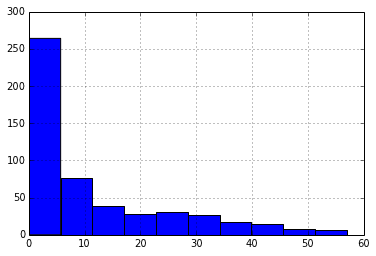

In [14]:
nyc_bike_frame['availableBikes'].hist()
plt.show()

Look at the range of total docks:

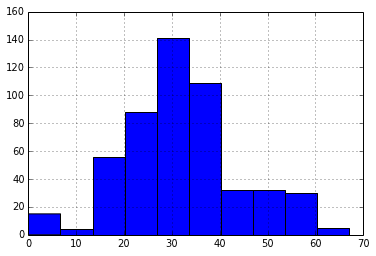

In [15]:
nyc_bike_frame['totalDocks'].hist()
plt.show()

These distributions differ because available bikes is a real time changing data point where as total docks is a fixed variable (at least in the short term). Total docks will not change unless more docks are added at the station.

### Summing up

We have a simple JSON structure:

![](files/nycbike4.jpg)

That we navigated with using the keys() function to explore the various levels (in this case 2 levels below the root level) and we have a good idea of the value ranges. We have a sense of the values we're dealing with.

## Challenge

<b>1. Explore the other data variables. Are there any test stations? How many stations are "In Service"? How many are "Not In Service"? Any other interesting variables values that need to be accounted for?</b>

In [16]:
# Test Stations:
print nyc_bike_frame.testStation.value_counts()

False    512
dtype: int64


No - there aren't any test stations in this dataset.

In [17]:
# Stations in-service vs. out of service:
print nyc_bike_frame.statusValue.value_counts()

In Service        493
Not In Service     19
dtype: int64


<b>Note:</b> We want to ensure there are no duplicate stations in here that could skew this result. Check for duplicates:

In [18]:
# Calling .head() will show the top counts; if there are any above 1 we know their are duplicate stations in the data:
nyc_bike_frame.groupby(['stationName'])['stationName'].count().head()

stationName
1 Ave & E 15 St    1
1 Ave & E 18 St    1
1 Ave & E 30 St    1
1 Ave & E 44 St    1
1 Ave & E 62 St    1
Name: stationName, dtype: int64

There are no duplicate stations. Thus, there are 488 'In Service' and 22 'Not in Service' stations in our dataset.    
<b>NOTE:</b> These are real time datasets, so they are subject to change if you run the scripts at different times.

Custom Function: It is useful to know quickly the number of unique values in each column of a dataframe. Columns with many unique values can be difficult to model and columns with only one or very few unique entries often don't add value to a model. The below function takes a dataframe and returns the number of unique entries for each column; allowing us to set a value for what we consider to be small for the given dataset we are working with.

In [19]:
def unique_entry_count(dataframe, small_value):
    '''
    takes a dataframe and returns the columns with the number of unique entries for that specific column; assigning values of 
    one_only, small or large; user chooses the unique count that will determine small / large in function parameters
    '''
    entry_list = [] #list that will contain the raw unique counts for each column in the dataframe
    
    columns = dataframe.columns #list of the dataframe's columns; to be used in the append portion to call to the correct column name and
    #in for the index in the new dataframe
    cols = ['unqiue_entries'] #the column name for the new dataframe
    col_len = len(columns)
    
    for i in range(col_len):
        entry_list.append(dataframe[columns[i]].value_counts().count()) #iterates through each column and counts the number of unique
        #entries and appends that final figure to the entry_list

    unique_entry_frame = pd.DataFrame(entry_list, index=columns, columns=cols) #creates new dataframe
    unique_entry_frame['size'] = unique_entry_frame['unqiue_entries'].apply(lambda x: 'one_only' if x == 1 else 'small' \
                                                                      if x < small_value else 'large')
    #based on number of unique entries; applies 'size' to that particular column
    
    return unique_entry_frame #returns new dataframe that will be used for next group of functions

In [20]:
# Set small value to 3
nyc_bike_column_counts = unique_entry_count(nyc_bike_frame, 3)
nyc_bike_column_counts

,unqiue_entries,size
altitude,1,one_only
availableBikes,52,large
availableDocks,59,large
city,1,one_only
id,512,large
landMark,1,one_only
lastCommunicationTime,213,large
latitude,512,large
location,1,one_only
longitude,512,large


There are a lot of columns with only one unique value or they are completely empty. We don't need these columns - we can delete them:

In [21]:
# create list of the one value columns:
nyc_one_value = nyc_bike_column_counts[(nyc_bike_column_counts['size'] == 'one_only')]
delete_list = nyc_one_value.index

# drop those columns in the original dataframe:
nyc_bike_frame = nyc_bike_frame.drop(delete_list, axis = 1)

#return original dataframe with deleted columns:
nyc_bike_frame.head(2)

,availableBikes,availableDocks,id,lastCommunicationTime,latitude,longitude,stAddress1,stationName,statusKey,statusValue,totalDocks
0,1,37,72,2015-11-03 10:35:45 AM,40.767272,-73.993929,W 52 St & 11 Ave,W 52 St & 11 Ave,1,In Service,39
1,22,11,79,2015-11-03 10:35:39 AM,40.719116,-74.006667,Franklin St & W Broadway,Franklin St & W Broadway,1,In Service,33


Already, we have a cleaner dataset to work with. Two other columns worth a look at this time would be the columns with 2 unique values:

In [22]:
print nyc_bike_frame.statusKey.value_counts()
print nyc_bike_frame.statusValue.value_counts()

1    493
3     19
dtype: int64
In Service        493
Not In Service     19
dtype: int64


I'm not sure what statusKey is describing, so I'll leave it for now. 'statusValue' could be important, it will stay as well.

The columns with 511<i>(subject to change depending on when script is run)</i> unique entries appear to be ID related; letting us know what station the data is referring to for that row. Latitude and Longtitude are important for location, but ID, StationName and street address are worth a quick look:

In [23]:
print nyc_bike_frame['id'].value_counts().head()
print nyc_bike_frame['stAddress1'].value_counts().head()
print nyc_bike_frame['stationName'].value_counts().head()

3071    1
3070    1
173     1
174     1
195     1
dtype: int64
Mercer St & Bleecker St     1
Bushwick Ave & Powers St    1
W 45 St & 6 Ave             1
Columbus Ave & W 72 St      1
6 Ave & Canal St            1
dtype: int64
Mercer St & Bleecker St     1
Bushwick Ave & Powers St    1
W 45 St & 6 Ave             1
Columbus Ave & W 72 St      1
6 Ave & Canal St            1
dtype: int64


We can see that these three columns are repeating the same information (id is a code that refers to the stationName). We will keep stationName and id (could be important later) and remove the address:

In [24]:
nyc_bike_frame = nyc_bike_frame.drop(['stAddress1'], axis=1)
nyc_bike_frame.head(2)

,availableBikes,availableDocks,id,lastCommunicationTime,latitude,longitude,stationName,statusKey,statusValue,totalDocks
0,1,37,72,2015-11-03 10:35:45 AM,40.767272,-73.993929,W 52 St & 11 Ave,1,In Service,39
1,22,11,79,2015-11-03 10:35:39 AM,40.719116,-74.006667,Franklin St & W Broadway,1,In Service,33


We have now a much cleaner and more meaningful dataset with the unncessary columns removed. We will decide later if 'statusKey' is required. 

<b>2. What is the mean number of bikes in a dock? What is the median? How does this change if we remove the stations that aren't in service?</b>

In [25]:
# Assuming mean and median number of bikes in a dock refers to the number of availableBikes.
nyc_bike_mean = nyc_bike_frame['availableBikes'].mean()
nyc_bike_median = nyc_bike_frame['availableBikes'].median()

print 'Available Bike Mean (all stations): ', nyc_bike_mean
print 'Available Bike Median (all stations): ',nyc_bike_median
print 'Number of Stations Included: ', len(nyc_bike_frame)
print ''

# Remove stations not in service:
nyc_bike_frame_inService = nyc_bike_frame[(nyc_bike_frame['statusValue'] == 'In Service')]

nyc_bike_inService_mean = nyc_bike_frame_inService['availableBikes'].mean()
nyc_bike_inService_median = nyc_bike_frame_inService['availableBikes'].median()

print 'Available Bike Mean (In Service stations): ', nyc_bike_inService_mean
print 'Available Bike Median (In Service stations): ',nyc_bike_inService_median
print 'Number of Stations Included: ', len(nyc_bike_frame_inService)

Available Bike Mean (all stations):  11.33984375
Available Bike Median (all stations):  5.0
Number of Stations Included:  512

Available Bike Mean (In Service stations):  11.7768762677
Available Bike Median (In Service stations):  6.0
Number of Stations Included:  493


The mean and median do not change significantly if you remove out of service stations. 

<b>Note: Here is an alternate way of calculating mean and median without having to create a new dataframe. You would add a simple conditional (a series of boolean, or True and False, values) to filter on the DataFrame (only the rows for the True values are in the result):</b>

In [26]:
condition = (nyc_bike_frame['statusValue'] == 'In Service')
print nyc_bike_frame[condition]['availableBikes'].mean()

# We can put the condition right into the statement making it one line:
print nyc_bike_frame[nyc_bike_frame['statusValue'] == 'In Service']['availableBikes'].mean()

11.7768762677
11.7768762677


<b>This method is prefered over the original method. It's cleaner and easier to implement.</b>

## Storing Data in SQLite

While often code can be developed iteratively (meaning you create code by making small changes that build on each other), designing a database requires more thoughtful planning, even one as simple as a SQLite database. We know now the structure of the data, which is important for creating the schema we'll be using in SQLite.

After going through the data more, you'll find that not every field seems to be used. Often this is because developers envision functionality that isn't yet built. In this case, no station has a value in the "landMark" field and only two have an entry in the "location" field. Someone likely envisoned these providing more information that was actually necessary when the system was activated but may, in the future, carry important information.

<b>Note:</b> In some cases, JSON files will only include the attributes of an instance for which there is a value. In this case, if there isn't a landmark, the attribute landMark may not be present in order to minimize the size of the file.

Most of these values don't change over time. The only fields likely to change are the availableBikes, availableDocks, statusValue, and the statusKey. In this case, since our goal is to record the number of bikes available every minute for an hour across all of New York City, we're primarily interested in the number of available bikes, but we want to keep all this reference information as well.

In order to capture both the changing values and the static reference information, we're going to create a reference table that tells us the information that remains static and a table that collects the changing values.

Our first step is to create a reference table that stores the information that remains static with the station ID (id) number as the key value.

In this case, we'll be storing these values in our reference table:

![](files/nycbike5.jpg)

Since the number of available docks and available bikes should equal the total docks, we only need to store one of these numbers, in this case, the available bikes. The available docks should be the total docks - the available bikes, but this is a case where we need to be clear about our assumptions and test them if necessary.   
<b>Comment:</b> In this case, our above assumption fails; there are stations where the available bikes plus the available docks does not add up to the total docks. Perhaps there are docks that are in need of repair and are thus, unavailable as a dock. However, we do not know why these numbers are not adding up correctly.

### Create SQL database

The SQL statement we'll be using to create the reference table looks like this:

![](files/nycbike6.jpg)

<b>Note:</b> My database will be slightly different since I cleaned the data originally differently. The concept remains identical. 

In [27]:
# Create the table to store the data:
import sqlite3 as lite

In [28]:
con = lite.connect('citi_bike.db') #this creates an empty sqlite database
cur = con.cursor() #once connected to the database, we create a cursor object to perform SQL commands

In [29]:
#recall dataframe using to create sql database:
nyc_bike_frame.head(1)

,availableBikes,availableDocks,id,lastCommunicationTime,latitude,longitude,stationName,statusKey,statusValue,totalDocks
0,1,37,72,2015-11-03 10:35:45 AM,40.767272,-73.993929,W 52 St & 11 Ave,1,In Service,39


In [30]:
#create table columns with datatypes
with con:
    cur.execute('CREATE TABLE citibike_reference( \
    id INT PRIMARY KEY, \
    totalDocks INT, \
    longitude NUMERIC, \
    stationName TEXT, \
    latitude NUMERIC)')

We use the <u>'with'</u> keyword as a context manager. At the end of the indented code block, the transaction will commit (be saved) to the database. It's the same result as using con.commit() but generally using 'with' is cleaner and more readable.

In [31]:
# Populate the table with our nyc_bike_frame:
sql = 'INSERT INTO citibike_reference (id,totalDocks,longitude,stationName,latitude) VALUES (?,?,?,?,?)'
# the number of columns you are going to insert need to match the number of '?' in the VALUES

#for loop to populate values in the database
with con:
    for station in nyc_bike.json()['stationBeanList']: #recall that we need to run the nyc_bike frame (original dataframe)
        #id,totalDocks,longitude,stationName,latitude
        cur.execute(sql,(station['id'],station['totalDocks'],station['longitude'],station['stationName'],station['latitude']))

The type of SQL query we're using in this case is called a "parameterized query", with ? standing in for values, which we reference in the cur.execute() function. <b>Notice the list of values has to match up otherwise values could be entered into the wrong field.</b> Verification this didn't happen is important to ensure this didn't happen. In most cases, it's better to drop the table and start again rather than try to fix the problem.

<b>Note:</b> To check to see if our database is being populated correctly we will load the database and verify it's correct:

In [32]:
print pd.read_sql_query('SELECT * FROM citibike_reference', con).head()
# 'SELECT *' will bring the entire table, 'con' at the end references the connection to the database. 

    id  totalDocks  longitude                    stationName   latitude
0   72          39 -73.993929               W 52 St & 11 Ave  40.767272
1   79          33 -74.006667       Franklin St & W Broadway  40.719116
2   82          27 -74.000165         St James Pl & Pearl St  40.711174
3   83          62 -73.976323  Atlantic Ave & Fort Greene Pl  40.683826
4  116          39 -74.001497                W 17 St & 8 Ave  40.741776


Our database is being populated correctly. <b>Verified.</b> 

To get multiple readings by minute, the availablebikes table is going to need to be a little different. In this case, the station ID (id) is going to be the column name, but since the column name can't start with a number, you'll need to put a character in front of the number ("").

In [33]:
#extract the 'id' column from the DataFrame and put them into a list:
station_ids = nyc_bike_frame['id'].tolist() 

#add the '_' to the station name and also add the data type for SQLite
station_ids = ['_' + str(x) + ' INT' for x in station_ids]

print station_ids[:5] 
print len(station_ids)

['_72 INT', '_79 INT', '_82 INT', '_83 INT', '_116 INT']
512


Create new SQLite database 'available_bikes':

In [34]:
#in this case, we're concatentating the string and joining all the station ids (now with '_' and 'INT' added)
with con:
    cur.execute('CREATE TABLE available_bikes (execution_time INT,' + ', '.join(station_ids) + ');')
    
# The syntax: + ', '.join(station_ids) has a space after the original comma because the station ids before the join look like
# '_72 INT', '_79 INT', etc. so we need a space after the comma so the code joins the station ids correctly. 

# The final addition; ');' closes the syntax so the code runs properly, SQL requires ';' to know the code has ended

In [35]:
#see created database:
pd.read_sql_query('SELECT * FROM available_bikes', con)

,execution_time,_72,_79,_82,_83,_116,_119,_120,_127,_128,...,_3226,_3229,_3230,_3231,_3232,_3233,_3234,_3235,_3236,_3237


<b>Comment:</b> Not sure exactly how this one is working - need clarification; specifically on: (execution_time INT, " +  ", ".join(station_ids) + ");")   
<b>Update:</b> Here, we are doing the following:   
1. We’re creating a table and hard-coding the first column to be an integer.   
2. Then we’re adding to that string ", ".join(station_ids), which is an easy way to concatenate strings in a list. For clarity,  x.join(y) uses x as a separator to connect all the elements in y together. For example, '-'.join([1, 2, 3]) becomes 1-2-3. In our case, ', '.join(['_72 INT', '_79 INT', ...]) becomes '_72 INT, _79 INT, ...'    
3. The final line, after adding on the close paren, is 'CREATE TABLE available_bikes (execution_time INT, _72 INT, _79 INT, ...);'

Populate new database with our values for available bikes. First we need some packages to deal with dates and time:

In [36]:
import time # a package with datetime objects
from dateutil.parser import parse # a package for parsing a string into a Python datetime object
import collections
import datetime #required for code below

In [37]:
#take the string from our original database (nyc_bike) in the executionTime column and parse it into a Python datetime object:
exec_time = parse(nyc_bike.json()['executionTime'])
print exec_time

2015-11-03 10:36:09


As you saw briefly in the lesson on time-series analysis, Python has a datetime object which stores datetime values. This object has attributes for year, month, day, hour, minute, second, microseconds, and timezone. In this case, we're creating a basic naive datetime object without specifying timezone.

In [38]:
# We create an entry for the execution time by inserting it into the database:
with con:    
    cur.execute('INSERT INTO available_bikes (execution_time) VALUES (?)', [exec_time.strftime('%Y-%m-%dT%H:%M:%S')],)

# function strftime() formats the time.

In [39]:
print pd.read_sql_query('SELECT * FROM available_bikes', con)

        execution_time   _72   _79   _82   _83  _116  _119  _120  _127  _128  \
0  2015-11-03T10:36:09  None  None  None  None  None  None  None  None  None   

   ...  _3226 _3229 _3230 _3231 _3232 _3233 _3234 _3235 _3236 _3237  
0  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[1 rows x 513 columns]


Then we iterate through the stations in the "stationBeanList":

In [40]:
id_bikes = collections.defaultdict(int) #defaultdict to store available bikes by station
id_bikes

defaultdict(int, {})

<b>Comment:</b> Do not understand how this default dict works and how I was supposed to know to create it using collections. Read the instructions several times over and see no reference to it. Will need to understand this part better.  

My current understanding is that this dictionary is set up with datatype 'int' for the key and then a dict for the values associated with that key. When we loop through the station list, each station (recorded as an INT) will be the key and the available bikes at that station will be the values associated with that key. 

<b>Update:</b> Suppose you have a dictionary 'my_dict' that you were using to accumulate other values. In a loop, you might write:

![](files/nycbike7.jpg)
        
If, however, your dictionary is empty, the first time it attempts to modify one of the values, you’ll get a KeyError.   
When we write <i>x += y</i>, the computer actually runs <i>x = x + y</i> (most of the time, but this can be manually overridden). Thus, in the case of our empty dictionary, we have:   
my_dict[key] = my_dict[key] + value   
If the dictionary is empty, or is missing a particular key, it can’t resolve my_dict[key]. To correct this, you could initialize all the elements before you run the loop, but this requires you to know all the keys in advance, which you might not if you have a large set of data. The other option is to simply stop the loop when you notice my_dict is missing a key, initialize the key, and then resume the loop. This is exactly what defaultdict does—if it sees you trying to access a key that isn’t in the dictionary, it gives you a default value of the data type when you created it. The material introduces them in section 1.1.4, but doesn’t explain what they are and doesn’t use them again until section 3.1.4.

In [41]:
#loop through the stations in the station list and add them to a dictionary where the station ID is the key and the number
#of available bikes is the associated value
for station in nyc_bike.json()['stationBeanList']: #recall that we need to run the nyc_bike frame (original dataframe)
    id_bikes[station['id']] = station['availableBikes']
    
#iterate through the defaultdict to update the values in the database
with con:
    for k, v in id_bikes.iteritems(): #k = key (station ID), v = values (available bikes)
        cur.execute('UPDATE available_bikes SET _' + str(k) + '=' + str(v) + \
                    ' WHERE execution_time = ?;', [exec_time.strftime('%Y-%m-%dT%H:%M:%S')] )

<b>Comment:</b> Very confused with the above statements. I don't understand why certain characters have been placed into the code when there have been no mention as to why they are there. Will need to go through this step by step for to understand this sufficiently.   

<b>Update:</b> This is happening because you overlooked one of the parameters after correcting what I pointed out in my last email. Compare these two lines:   

![](files/nycbike8.jpg)

You accidentally left <i>+ ';'</i> at the end, after a comma, by itself, so python was attempting to evaluate it. Because you only have something on one side of the +, it’s being used as a unary operator (rather than its usual use as a binary operator), and so Python complains that the type str (i.e., your ;) can’t be used with the unary operator. <b>Also note that I added an extra space before WHERE, because otherwise str(v) + 'WHERE ...' would become, for example, '12WHERE ...'</b>

In [43]:
print pd.read_sql_query('SELECT * FROM available_bikes', con)

        execution_time  _72  _79  _82  _83  _116  _119  _120  _127  _128  \
0  2015-11-03T10:36:09    1   22   17   15     8     3     3    30     0   

   ...    _3226  _3229  _3230  _3231  _3232  _3233  _3234  _3235  _3236  _3237  
0  ...        1      0      0     29      4     36     45     28      0      9  

[1 rows x 513 columns]


<b>Note:</b> If you have data in your available_bikes table and want to delete it, you can do that by running the query:   
<i>"DELETE FROM available_bikes".</i> <b>This will remove all rows in the table.</b>

In [44]:
with con:
    cur.execute('DELETE FROM available_bikes')
    
print pd.read_sql_query('SELECT * FROM available_bikes', con)

Empty DataFrame
Columns: [execution_time, _72, _79, _82, _83, _116, _119, _120, _127, _128, _137, _143, _144, _146, _147, _150, _151, _152, _153, _157, _160, _161, _164, _167, _168, _173, _174, _195, _212, _216, _217, _218, _223, _224, _225, _228, _229, _232, _233, _236, _237, _238, _239, _241, _242, _243, _244, _245, _247, _248, _249, _250, _251, _252, _253, _254, _257, _258, _259, _260, _261, _262, _263, _264, _265, _266, _267, _268, _270, _274, _275, _276, _278, _279, _280, _281, _282, _284, _285, _289, _290, _291, _293, _294, _295, _296, _297, _298, _300, _301, _302, _303, _304, _305, _306, _307, _308, _309, _310, _311, ...]
Index: []

[0 rows x 513 columns]


<b>Update Above Code to Run for One Hour to Collect City Bike Data:</b>

The below code will run stand alone and return a complete database of available bikes every minute for each station. 

In [ ]:
con = lite.connect('citi_bike.db')
cur = con.cursor()

for i in range(60):
    nyc_bike = requests.get('http://www.citibikenyc.com/stations/json')
    exec_time = parse(nyc_bike.json()['executionTime'])

    with con:
        cur.execute('INSERT INTO available_bikes (execution_time) VALUES (?)', [exec_time.strftime('%Y-%m-%dT%H:%M:%S')],)

    id_bikes = collections.defaultdict(int)
    for station in nyc_bike.json()['stationBeanList']:
        id_bikes[station['id']] = station['availableBikes']

    with con:
        for k, v in id_bikes.iteritems(): #k = key (station ID), v = values (available bikes)
            cur.execute('UPDATE available_bikes SET _' + str(k) + '=' + str(v) + \
                        ' WHERE execution_time = ?;', [exec_time.strftime('%Y-%m-%dT%H:%M:%S')] )

    time.sleep(60)

con.close() #close the database connection when done